In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math


path = "C:/Users/user/Documents/Code/Machine-Learning/img"
dataset = "C:/Users/user/Documents/Code/Machine-Learning/dataset"

In [2]:
categories = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]

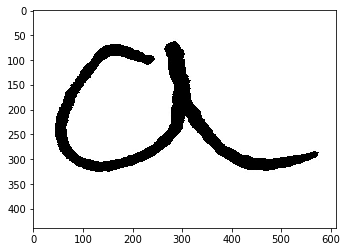

In [3]:
im = 0

for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), 0)
    kernel = np.ones((2,2),np.uint8)
    erosion = cv2.erode(img_array,kernel,iterations = 10)
    ret, thresh = cv2.threshold(erosion, 127, 255, 0)
    image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    letterNb = len(categories) - 1
    previousX = 0
    previousY = 0
    
    im = im + 1
    
    for i in range(len(contours)):

        cnt = contours[i]
        x,y,w,h = cv2.boundingRect(cnt)
        img_crop = img_array[y:y+h,x:x+w]
        if( w*h>= 400 and h <= 70 and w <= 50) :
            #if abs(previousX - x) > 25*w :      
            #    letterNb = letterNb - 1
            #        
            #    if(letterNb < 0):
            #        letterNb = 0
            #    elif letterNb > 26:
            #        letterNb = 25
            # pathToSave = os.path.join(dataset,categories[letterNb])
            cv2.imwrite("%s-letter%s.png" % (im,i),img_crop)
            #previousX = x
            #previousY = y
        img = cv2.rectangle(img_array, (x,y), (x+w,y+h), (255,255,255, 2))

    
    cnt = contours[0]
    plt.imshow(img_array, cmap="gray")
    plt.show()

In [4]:
str(img.title)

AttributeError: 'numpy.ndarray' object has no attribute 'title'